# Naive Identifier: Final model

This notebook features the most interesting model using NaiveIdentifier. 

In [1]:
%run notebook_utils.py

from sklearn.feature_extraction.text import CountVectorizer

%cd ..
from langid import NaiveIdentifier, np_sanitize
%cd - 

/Users/Lin/git/SwigSpot/language-detection
/Users/Lin/git/SwigSpot/language-detection/notebooks


In [13]:
import matplotlib
# set big font in plots
SMALL_SIZE = 20
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [3]:
# load data
X_train, X_test, y_train, y_test = load_split_data()
sms_any_X, sms_any_y = load_sms_any()
X_valid, y_valid = load_validation_data()

# Model training

In [4]:
# train the model
clf = NaiveIdentifier(
    klass=CountVectorizer, 
    analyzer='word', 
    ngram_range=(1,3), 
    max_features=3000)
clf.fit(np_sanitize(X_train), y_train)

# Model evaluation

TEST SET
accuracy: 0.9816

             precision    recall  f1-score   support

         de     0.9293    0.9979    0.9624      1462
         fr     0.9946    1.0000    0.9973      1468
         en     0.9942    0.9967    0.9955      1538
         it     0.9980    0.9980    0.9980      1482
         sg     0.9962    0.9131    0.9528      1438

avg / total     0.9826    0.9816    0.9815      7388



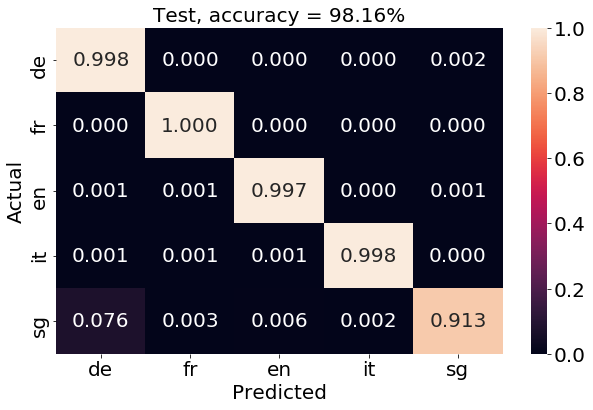

SMS RECALL
total samples    10692
total errors       460 (4.30%)
---------------------------------
languages detected
    de      371
    fr       32
    en       37
    it       20
    sg    10232


SMS ANY
accuracy: 0.9264

             precision    recall  f1-score   support

         de     0.8842    0.8358    0.8593       201
         fr     0.9892    0.9104    0.9482       201
         en     0.9844    0.9403    0.9618       201
         it     0.9850    0.9801    0.9825       201
         sg     0.8151    0.9652    0.8838       201

avg / total     0.9316    0.9264    0.9271      1005



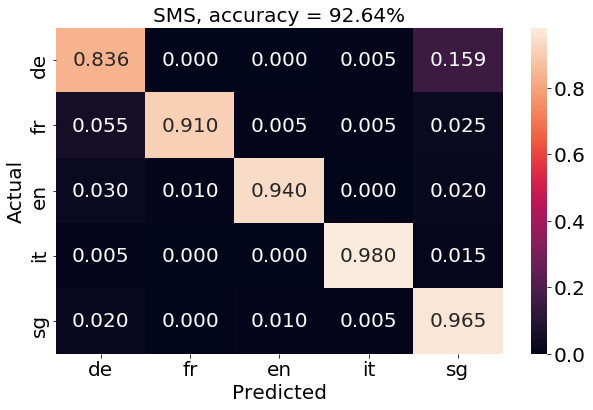



VALIDATION SET
accuracy: 0.9838

             precision    recall  f1-score   support

         de     0.9348    0.9981    0.9654      2613
         fr     0.9969    0.9992    0.9981      2613
         en     0.9962    0.9992    0.9977      2613
         it     0.9977    0.9962    0.9969      2613
         sg     0.9975    0.9261    0.9605      2613

avg / total     0.9846    0.9838    0.9837     13065



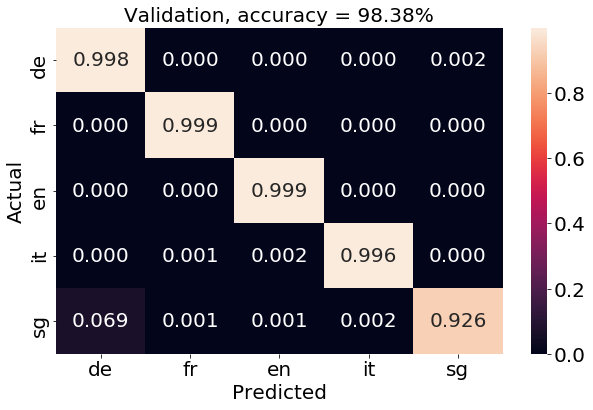

In [14]:
print("TEST SET")
print("========")
y_pred = clf.predict(np_sanitize(X_test))
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True, 
    title="Test, accuracy = %.2f%%" % (metrics.accuracy_score(y_test, y_pred) * 100))
print("SMS RECALL")
print("==========")

test_recall_with_sms(clf)

print("\n\nSMS ANY")
print("==========")
y_sms_any_pred = clf.predict(np_sanitize(sms_any_X))
print_results(sms_any_y, y_sms_any_pred)
plot_confusion_matrix(sms_any_y, y_sms_any_pred, normalised=True,
    title="SMS, accuracy = %.2f%%" % (metrics.accuracy_score(sms_any_y, y_sms_any_pred) * 100))

print("\n\nVALIDATION SET")
print("===============")
y_valid_pred = clf.predict(np_sanitize(X_valid))
print_results(y_valid, y_valid_pred)
plot_confusion_matrix(y_valid, y_valid_pred, normalised=True,
    title="Validation, accuracy = %.2f%%" % (metrics.accuracy_score(y_valid, y_valid_pred) * 100))

# Model export

In [11]:
# model export
import pickle

filename = "Sanitize-CountVec_feat3000_1-3wordgrams-NaiveIdentifier.pickle"
with open(filename, 'wb') as f: pickle.dump(clf, f)

# A peek at the features

In [8]:
clf.vectorizers[0].get_feature_names()

['ab',
 'ab dem',
 'ab der',
 'ab war',
 'abend',
 'aber',
 'aber auch',
 'aber in',
 'abgelöst',
 'abgeschlossen',
 'ablauf',
 'abs',
 'abschluss',
 'abschnitt',
 'absolvierte',
 'abstammung',
 'abstand',
 'abteilung',
 'achse',
 'acht',
 'afrika',
 'ag',
 'air',
 'akademie',
 'aktiv',
 'aktiven',
 'aktivitäten',
 'al',
 'albert',
 'album',
 'alfred',
 'alle',
 'allein',
 'allem',
 'allen',
 'aller',
 'allerdings',
 'alles',
 'als',
 'als auch',
 'als der',
 'als die',
 'als ein',
 'als eine',
 'als einer',
 'als einer der',
 'als er',
 'als es',
 'als sie',
 'also',
 'alt',
 'alte',
 'alten',
 'alter',
 'alter von',
 'am',
 'am april',
 'am april wurde',
 'am august',
 'am dezember',
 'am ende',
 'am februar',
 'am januar',
 'am juli',
 'am juli wurde',
 'am juni',
 'am mai',
 'am main',
 'am märz',
 'am november',
 'am oktober',
 'am september',
 'america',
 'amerika',
 'amerikanische',
 'amerikanischen',
 'amt',
 'amtszeit',
 'an',
 'an bord',
 'an das',
 'an dem',
 'an den',
 'an 